In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# load datasets
datasets = pd.read_csv("HR_comma_sep.csv")
datasets.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Data Understanding

Datasets ini merupakan daftar dari data karyawan yang mana datasets ini digunakan untuk melihat apakah karyawan meninggalkan perusahaan atau tidak<br><br>
Sebelum membuat model machine learning untuk mengklasifikasikan dari gaji seorang karyawan pertama kali hal yang harus dilakukan :<br>
- Melihat terdapat missing value atau tidak pada data
- Melihat terdapat duplikasi data atau tidak
- Melihat terdapat nilai outlier atau tidak pada data

## Cleaning Data

In [9]:
# melihat variable target
datasets["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
print(f"Duplikasi data: {datasets.duplicated().sum()}")

Duplikasi data: 3008


Terdapat 3008 entries data duplikasi. Data duplikasi ini harus dihapus dari datasets.

In [11]:
# menghapus nilai duplikasi pada data
datasets.drop_duplicates(inplace=True)

In [12]:
# check dataset duplikat sudah terhapus atau belum
print(f"Duplikasi data: {datasets.duplicated().sum()}")

Duplikasi data: 0


In [13]:
datasets.shape

(11991, 10)

Setelah data duplikasi dihapus jumlah entries data 11991.

In [14]:
# check apakah ada missing value
datasets.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Exploratory Data Analysis (EDA)

In [15]:
# melihat satisfaction_level
datasets_eda = datasets.copy()
datasets_eda.satisfaction_level.describe()

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [16]:
datasets_eda["satis_cat"] = pd.cut(datasets_eda["satisfaction_level"], bins=[0, 0.25, 0.4, 0.65, 0.90, 1],
                               labels=["sangat tidak bahagia", "tidak bahagia", "bahagia", "cukup bahagia", "sangat bahagia"])

In [17]:
datasets_eda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,satis_cat
0,0.38,0.53,2,157,3,0,1,0,sales,low,tidak bahagia
1,0.80,0.86,5,262,6,0,1,0,sales,medium,cukup bahagia
2,0.11,0.88,7,272,4,0,1,0,sales,medium,sangat tidak bahagia
3,0.72,0.87,5,223,5,0,1,0,sales,low,cukup bahagia
4,0.37,0.52,2,159,3,0,1,0,sales,low,tidak bahagia


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoder = le.fit_transform(datasets_eda["salary"])

In [19]:
datasets_eda.drop("salary", axis=1, inplace=True)
datasets_eda["salary"] = label_encoder

In [20]:
corr_matrix = datasets_eda.corr()

<ipython-input-20-a83dcf12d29a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datasets_eda.corr()


In [21]:
corr_matrix["left"].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
salary                   0.004224
promotion_last_5years   -0.044657
Work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64

In [22]:
# drop feature irelevant
datasets_eda.drop("Work_accident", axis=1, inplace=True)

In [23]:
datasets_eda["ratio_per_project"] = datasets_eda["time_spend_company"] / datasets_eda["number_project"]
datasets_eda["project_pere_hours"] = datasets_eda["average_montly_hours"] / datasets_eda["number_project"]

In [24]:
# columns yang akan dihapus berdasarkan nilai korelasinya
# "last_evaluation", "salary"
datasets_eda.drop(["last_evaluation", "salary", "Department"], axis=1, inplace=True)

In [25]:
corr_matrix = datasets_eda.corr()
corr_matrix["left"].sort_values(ascending=False)

<ipython-input-25-3301e1378eba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = datasets_eda.corr()


left                     1.000000
ratio_per_project        0.191534
time_spend_company       0.173295
average_montly_hours     0.070409
project_pere_hours       0.067178
number_project           0.030928
promotion_last_5years   -0.044657
satisfaction_level      -0.350558
Name: left, dtype: float64

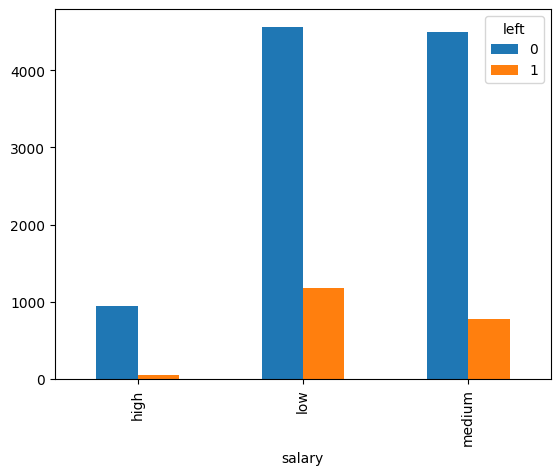

In [123]:
# Visualize data
pd.crosstab(datasets.salary, datasets.left).plot(kind="bar")
plt.show()

Berdasarkan  dari visualisasi diatas karyawawn yang masih bertahan adalah karyawan yang memiliki rentang gaji tinggi/high sedangkan untuk low dan medium banyak dari mereka yang resign.

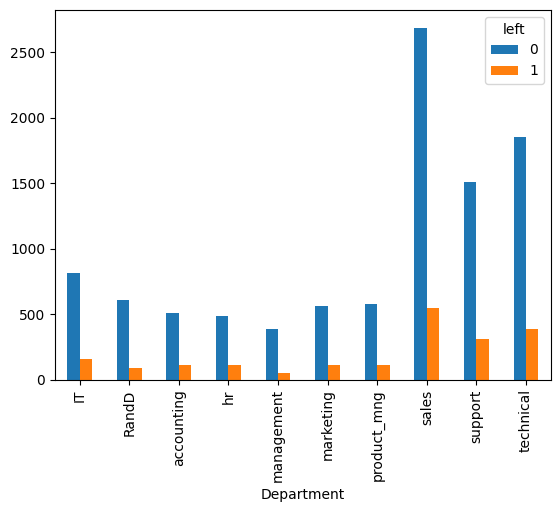

In [126]:
# Visualize data
pd.crosstab(datasets.Department, datasets.left).plot(kind="bar")
plt.show()

Berdasarkan data diatas dari department diatas sales, technical dan support banyak yang memutuskan untuk resign.

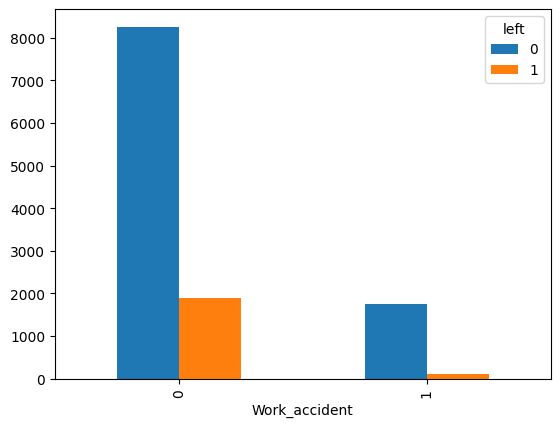

In [128]:
# Visualize data
pd.crosstab(datasets.Work_accident, datasets.left).plot(kind="bar")
plt.show()

Berdasarkan data diatas hasilnya menunjukan justru orang yang tidak mengalami kecelekaan kerja cenderung lebih banyak memutuskan resign ketimbang orang yang pernah mengalami kecelakaan kerja.

## Modeling Data

In [26]:
datasets_final = datasets_eda.copy()
datasets_final.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,satis_cat,ratio_per_project,project_pere_hours
0,0.38,2,157,3,1,0,tidak bahagia,1.500000,78.500000
1,0.80,5,262,6,1,0,cukup bahagia,1.200000,52.400000
2,0.11,7,272,4,1,0,sangat tidak bahagia,0.571429,38.857143
3,0.72,5,223,5,1,0,cukup bahagia,1.000000,44.600000
4,0.37,2,159,3,1,0,tidak bahagia,1.500000,79.500000


In [27]:
datasets_final.duplicated().sum()
datasets_final.drop_duplicates(inplace=True)

In [28]:
datasets_final.drop("satis_cat", axis=1, inplace=True)

In [29]:
datasets_final.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,ratio_per_project,project_pere_hours
0,0.38,2,157,3,1,0,1.500000,78.500000
1,0.80,5,262,6,1,0,1.200000,52.400000
2,0.11,7,272,4,1,0,0.571429,38.857143
3,0.72,5,223,5,1,0,1.000000,44.600000
4,0.37,2,159,3,1,0,1.500000,79.500000


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

X = datasets_final.drop("left", axis=1)
y = datasets_final["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y ,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9764, 7), (1085, 7), (9764,), (1085,))

In [70]:
lr = LogisticRegression(max_iter=100)
minmax = MinMaxScaler()
minmax.fit(X_train)
lr.fit(minmax.transform(X_train), y_train)
lr.score(minmax.transform(X_train), y_train)

0.8921548545678001

In [71]:
lr.score(minmax.transform(X_test), y_test)

0.8903225806451613

In [95]:
# modeling with Normalization with logistic regresion
from sklearn.neighbors import KNeighborsClassifier
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [96]:
knn.fit(minmax.transform(X_train), y_train)

KNeighborsClassifier()

In [97]:
knn.score(minmax.transform(X_train), y_train)

0.9756247439573945

In [98]:
knn.score(minmax.transform(X_test), y_test)

0.9714285714285714

In [99]:
np.array(y_test[:30])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
predictions = knn.predict(minmax.transform(X_test[:30]))
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## Evaluate Best Model

In [114]:
from sklearn.metrics import f1_score
acc_score_f1 = f1_score(y_train, knn.predict(minmax.transform(X_train)))
acc_score_f1.round(3)

0.894

In [113]:
acc_score_f1 = f1_score(y_test, knn.predict(minmax.transform(X_test)))
acc_score_f1.round(3)

0.878

In [111]:
from sklearn.metrics import recall_score
recall = recall_score(y_train, knn.predict(minmax.transform(X_train)))
recall.round(3)

0.865

In [110]:
recall = recall_score(y_test, knn.predict(minmax.transform(X_test)))
recall.round(3)

0.862

In [108]:
from sklearn.metrics import precision_score
precision = precision_score(y_train, knn.predict(minmax.transform(X_train)))
precision.round(3)

0.926

In [107]:
precision = precision_score(y_test, knn.predict(minmax.transform(X_test)))
precision.round(3)

0.896

Conclusion: Dari best model mendapatkan hasil untuk test set berdasarkan matrix yang digunakan. Diantaranya adalah : <br>
- f1 score : 87.8%
- recall : 86.2%
- precision : 89.6%